<a href="https://colab.research.google.com/github/Gitinitty-5/Python-Projects/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a superstore dataset contains the growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

 #Business Problem

*Demographic Insights(what are common Branch Cities, various customer types, gender disparities, product lines and thier various contributions  towards the overall revenue generated over the period of business operations).
*Which Branch contributed the highest revenue from overall sales.

*The highest customertype contributing to sales

*Which category under product line recorded the highest revenue towards overall sales.

*Find the gender disparity in terms of total count.

*Find the total count of various mode of payment and their overall contribution to sales.





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel("/content/drive/My Drive/Sales/sales_analysis.xlsx")

In [28]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [29]:
df.shape

(1000, 17)

In [30]:
df.duplicated().sum()

0

In [31]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,0.000000,11.708825,1.71858


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [47]:
#Creating new columns to find the day, month and year
df['date'] = pd.to_datetime(df['Date'])

df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [48]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,date,day,month,year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019-03-08,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08,8,2,2019


In [95]:
df['Branch'] = df[['Branch', 'City']].agg('Branch in city'.join, axis=1)

In [96]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,cogs,gross margin percentage,gross income,Rating,date,day,month,year,time,hour
0,750-67-8428,ABranch in cityYangon,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,522.83,4.761905,26.1415,9.1,2019-01-05,5,1,2019,1900-01-01 13:08:00,13
1,226-31-3081,CBranch in cityNaypyitaw,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,76.40,4.761905,3.8200,9.6,2019-03-08,8,3,2019,1900-01-01 10:29:00,10
2,631-41-3108,ABranch in cityYangon,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,324.31,4.761905,16.2155,7.4,2019-03-03,3,3,2019,1900-01-01 13:23:00,13
3,123-19-1176,ABranch in cityYangon,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,465.76,4.761905,23.2880,8.4,2019-01-27,27,1,2019,1900-01-01 20:33:00,20
4,373-73-7910,ABranch in cityYangon,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,604.17,4.761905,30.2085,5.3,2019-02-08,8,2,2019,1900-01-01 10:37:00,10


In [102]:
df['time'] = pd.to_datetime(df['Time'])

df['hour'] = pd.to_datetime(df['time']).dt.hour

In [103]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,cogs,gross margin percentage,gross income,Rating,date,day,month,year,time,hour
0,750-67-8428,ABranch in cityYangon,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,522.83,4.761905,26.1415,9.1,2019-01-05,5,1,2019,1900-01-01 13:08:00,13
1,226-31-3081,CBranch in cityNaypyitaw,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,76.40,4.761905,3.8200,9.6,2019-03-08,8,3,2019,1900-01-01 10:29:00,10
2,631-41-3108,ABranch in cityYangon,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,324.31,4.761905,16.2155,7.4,2019-03-03,3,3,2019,1900-01-01 13:23:00,13
3,123-19-1176,ABranch in cityYangon,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,465.76,4.761905,23.2880,8.4,2019-01-27,27,1,2019,1900-01-01 20:33:00,20
4,373-73-7910,ABranch in cityYangon,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,604.17,4.761905,30.2085,5.3,2019-02-08,8,2,2019,1900-01-01 10:37:00,10


In [106]:
#finding the total number of branch for the whole Business period
Branch_in_city = df['Branch'].value_counts().sort_index()
print(Branch_in_city)

Branch
A    340
B    332
C    328
Name: count, dtype: int64


QUESTION
1. Which Branch contributed the highest revenue from sales.

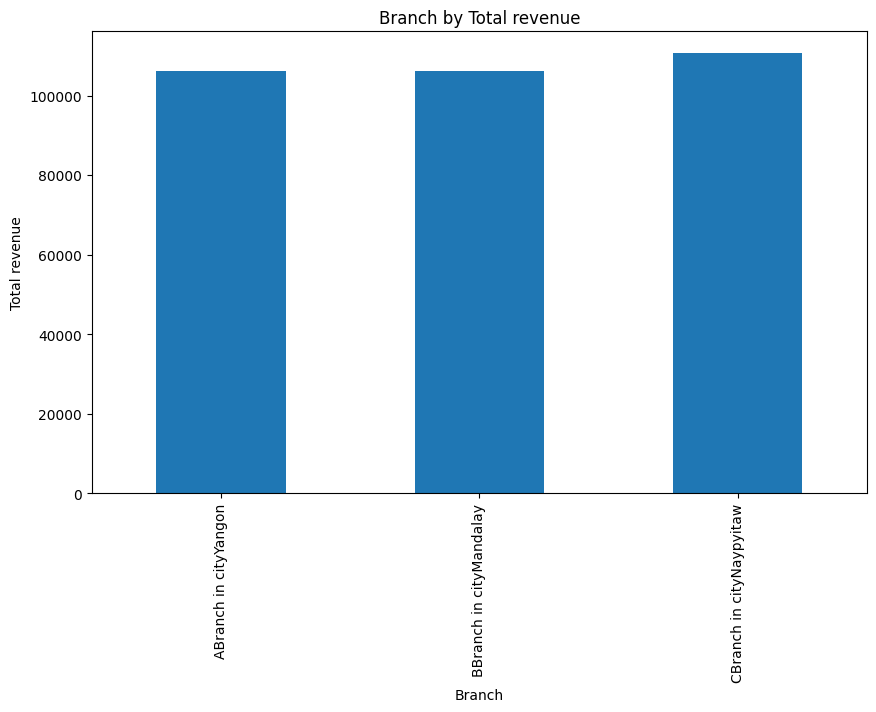

In [97]:
import matplotlib.pyplot as plt

#plot bar graph of 'branch' column as against
branch =df.groupby(['Branch'])['Total'].sum().round()
plt.figure(figsize=(10,6))
branch.plot(kind= 'bar')
plt.title('Branch by Total revenue')
plt.ylabel('Total revenue')
plt.xlabel('Branch')
plt.show()

*C Branch in city Naypyitaw contributed highest amount of revenue in terms of overall sales revenue.



QUESTION
   2.Which customertype contibuted much in terms of total revenue

In [70]:
# total count of categories under customertype
customer_type = df['Customer type'].value_counts()
print(customer_type)

Customer type
Member    501
Normal    499
Name: count, dtype: int64


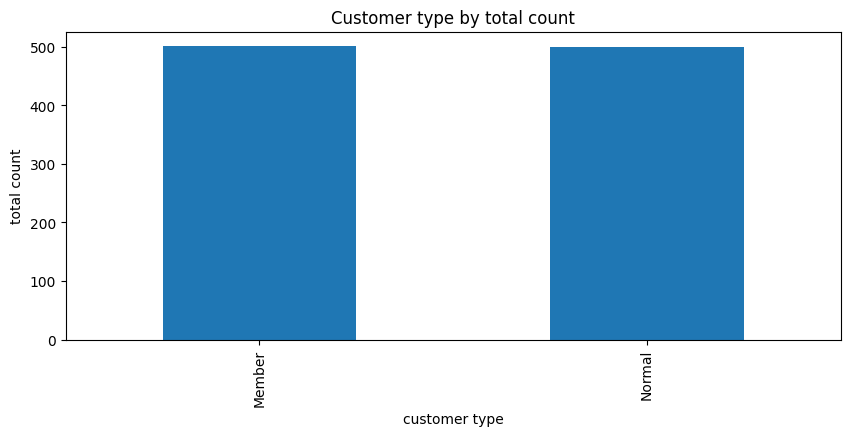

In [73]:
import matplotlib.pyplot as plt

customer_type = df['Customer type'].value_counts()
plt.figure(figsize=(10,4))
customer_type.plot(kind= 'bar')
plt.title('Customer type by total count')
plt.xlabel('customer type')
plt.ylabel('total count')
plt.show()

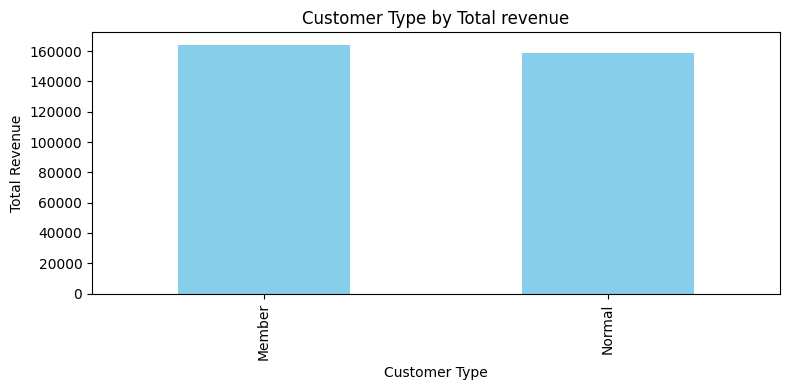

In [3]:
import matplotlib.pyplot as plt

# Calculate total revenue for each customer type
total_revenue_per_customer_type = df.groupby('Customer type')['Total'].sum()

plt.figure(figsize=(8, 4))
total_revenue_per_customer_type.plot(kind='bar', color='skyblue')
plt.title('Customer Type by Total revenue')
plt.xlabel('Customer Type')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

The member category under the customertype contributed slightly over the normal customers.

In [87]:
total_revenue_per_product_line = df.groupby(['Product line'])['Total'].sum().round()
print(total_revenue_per_product_line)

Product line
Electronic accessories    54338.0
Fashion accessories       54306.0
Food and beverages        56145.0
Health and beauty         49194.0
Home and lifestyle        53862.0
Sports and travel         55123.0
Name: Total, dtype: float64


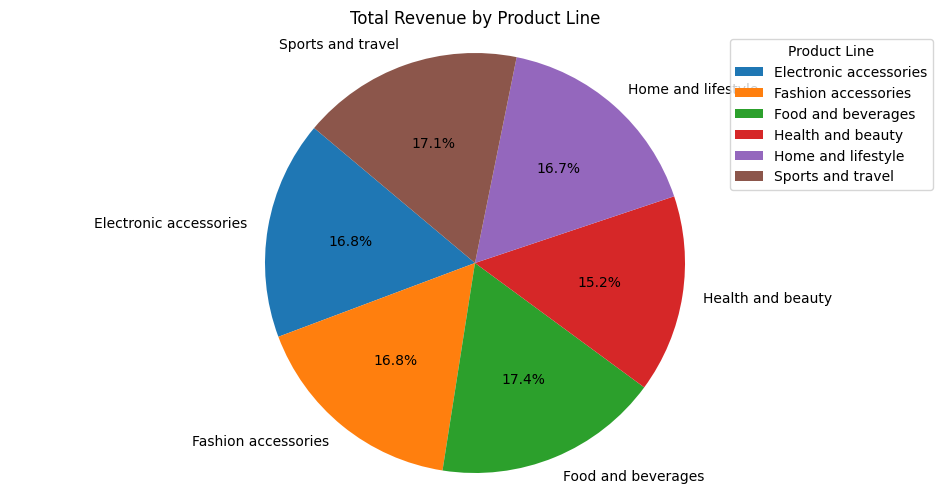

In [160]:
import matplotlib.pyplot as plt
total_revenue_per_product_line
# Plotting the pie chart
plt.figure(figsize=(12, 6))
plt.pie(total_revenue_per_product_line, labels=total_revenue_per_product_line.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Revenue by Product Line')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#adding legend
plt.legend(total_revenue_per_product_line.index, title = 'Product Line', loc = 'best')

plt.show()


In [138]:
product_line_per_quantity= df.groupby(['Product line'])['Quantity'].count()
print(product_line_per_quantity)

Product line
Electronic accessories    170
Fashion accessories       178
Food and beverages        174
Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Name: Quantity, dtype: int64


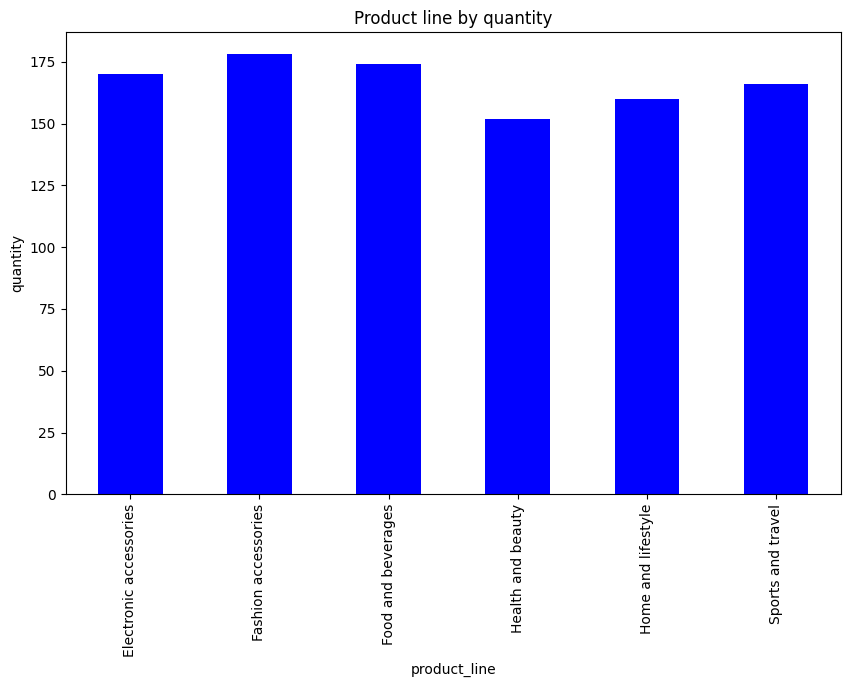

In [141]:
import matplotlib.pyplot as plt
product_line_per_quantity


#Plot the graph
plt.figure(figsize=(10,6))
product_line_per_quantity.plot(kind= 'bar', color= 'blue')
plt.title('Product line by quantity')
plt.xlabel('product_line')
plt.ylabel('quantity')
plt.show()


In [145]:
count_of_gender = df['Gender'].value_counts()
print(count_of_gender)

Gender
Female    501
Male      499
Name: count, dtype: int64


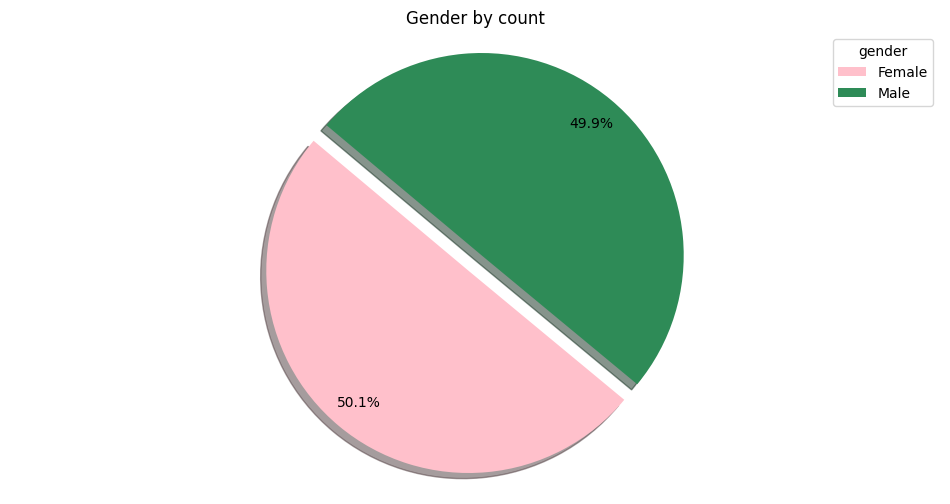

In [161]:
colors =['pink','seagreen']
explode = [0.05]*len(count_of_gender)

plt.figure(figsize=(12,6))
plt.pie(count_of_gender, explode = explode, shadow = True, autopct = '%1.1f%%', startangle=140, pctdistance = 0.85, colors= colors)
plt.axis('equal')
plt.title('Gender by count')
plt.legend(count_of_gender.index, title = 'gender', loc = 'best')
plt.show()

In [155]:
payment_options = df['Payment'].value_counts()
print(payment_options)

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


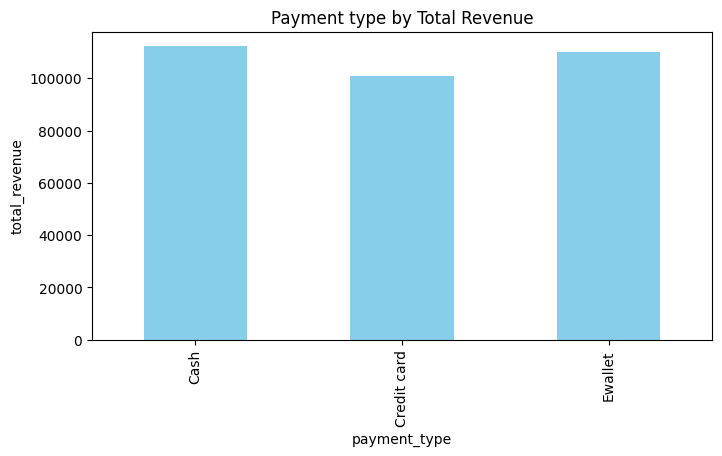

In [162]:
import matplotlib.pyplot as plt

# Calculate payment_type against total revenue
payment_type_per_total_revenue = df.groupby('Payment')['Total'].sum()

plt.figure(figsize=(8, 4))
payment_type_per_total_revenue.plot(kind='bar', color='skyblue')
plt.title('Payment type by Total Revenue')
plt.xlabel('payment_type')
plt.ylabel('total_revenue')
plt.show()